# Ansu Fati Shot Map

- **The data used for this is obtained from Understat.**
- **Player shot data from both the seasons were obtained and later merged in an Excel sheet to get one single shot data**.

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mplsoccer import VerticalPitch, Pitch #library used for football visualizations
from mplsoccer.utils import FontManager
from highlight_text import htext, fig_text, HighlightText

In [2]:
#loading the dataset
ansu_df = pd.read_csv('Ansu_Fati_shots.csv')
ansu_df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,313490,85,MissedShots,0.925,0.276,0.079727,Anssumane Fati,h,7967,OpenPlay,2019,RightFoot,12042,Barcelona,Real Betis,5,2,25-08-2019 20:00,Clement Lenglet,Chipped
1,315904,50,Goal,0.886,0.515,0.029739,Anssumane Fati,a,7967,OpenPlay,2019,Head,12043,Osasuna,Barcelona,2,2,31-08-2019 16:00,Carles Pérez,Aerial
2,315910,58,SavedShot,0.819,0.736,0.024359,Anssumane Fati,a,7967,OpenPlay,2019,RightFoot,12043,Osasuna,Barcelona,2,2,31-08-2019 16:00,Arthur,Pass
3,317705,1,Goal,0.878,0.464,0.111304,Anssumane Fati,h,7967,OpenPlay,2019,RightFoot,12054,Barcelona,Valencia,5,2,14-09-2019 19:00,Frenkie de Jong,Pass
4,317707,15,BlockedShot,0.799,0.672,0.052349,Anssumane Fati,h,7967,OpenPlay,2019,RightFoot,12054,Barcelona,Valencia,5,2,14-09-2019 19:00,Jordi Alba,TakeOn


In [3]:
ansu_df['X'] = ansu_df['X'] * 100
ansu_df['Y'] = ansu_df['Y'] * 100

ansu_df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,313490,85,MissedShots,92.500000,27.600000,0.079727,Anssumane Fati,h,7967,OpenPlay,2019,RightFoot,12042,Barcelona,Real Betis,5,2,25-08-2019 20:00,Clement Lenglet,Chipped
1,315904,50,Goal,88.599998,51.500000,0.029739,Anssumane Fati,a,7967,OpenPlay,2019,Head,12043,Osasuna,Barcelona,2,2,31-08-2019 16:00,Carles Pérez,Aerial
2,315910,58,SavedShot,81.900002,73.599998,0.024359,Anssumane Fati,a,7967,OpenPlay,2019,RightFoot,12043,Osasuna,Barcelona,2,2,31-08-2019 16:00,Arthur,Pass
3,317705,1,Goal,87.800003,46.400002,0.111304,Anssumane Fati,h,7967,OpenPlay,2019,RightFoot,12054,Barcelona,Valencia,5,2,14-09-2019 19:00,Frenkie de Jong,Pass
4,317707,15,BlockedShot,79.900002,67.199997,0.052349,Anssumane Fati,h,7967,OpenPlay,2019,RightFoot,12054,Barcelona,Valencia,5,2,14-09-2019 19:00,Jordi Alba,TakeOn


In [4]:
#creating a seperate dataset of just the goals
ansu_goals = ansu_df[ansu_df['result'] == 'Goal']
ansu_goals

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
1,315904,50,Goal,88.599998,51.500000,0.029739,Anssumane Fati,a,7967,OpenPlay,2019,Head,12043,Osasuna,Barcelona,2,2,31-08-2019 16:00,Carles Pérez,Aerial
3,317705,1,Goal,87.800003,46.400002,0.111304,Anssumane Fati,h,7967,OpenPlay,2019,RightFoot,12054,Barcelona,Valencia,5,2,14-09-2019 19:00,Frenkie de Jong,Pass
17,357423,29,Goal,82.500000,55.500000,0.218140,Anssumane Fati,h,7967,OpenPlay,2019,RightFoot,12233,Barcelona,Levante,2,1,02-02-2020 20:00,Lionel Messi,TakeOn
18,357424,31,Goal,91.500000,64.099998,0.107766,Anssumane Fati,h,7967,OpenPlay,2019,LeftFoot,12233,Barcelona,Levante,2,1,02-02-2020 20:00,Lionel Messi,Pass
23,364665,41,Goal,84.300003,56.900001,0.082426,Anssumane Fati,h,7967,OpenPlay,2019,RightFoot,12307,Barcelona,Leganes,2,0,16-06-2020 20:00,Júnior Firpo,Pass
28,369298,85,Goal,86.199997,63.700001,0.097940,Anssumane Fati,a,7967,OpenPlay,2019,RightFoot,12361,Villarreal,Barcelona,1,4,05-07-2020 20:00,Jordi Alba,Chipped
32,372493,23,Goal,92.500000,44.500000,0.092285,Anssumane Fati,a,7967,OpenPlay,2019,RightFoot,12393,Alaves,Barcelona,0,5,19-07-2020 19:00,NaN,None
33,379830,14,Goal,87.800003,57.500000,0.104093,Anssumane Fati,h,7967,OpenPlay,2020,RightFoot,14156,Barcelona,Villarreal,4,0,27-09-2020 19:00,Jordi Alba,Pass
34,379832,18,Goal,91.699997,62.500000,0.348168,Anssumane Fati,h,7967,OpenPlay,2020,RightFoot,14156,Barcelona,Villarreal,4,0,27-09-2020 19:00,Philippe Coutinho,Pass
35,380250,10,Goal,88.300003,57.299999,0.103752,Anssumane Fati,a,7967,OpenPlay,2020,RightFoot,14165,Celta Vigo,Barcelona,0,3,01-10-2020 19:30,Philippe Coutinho,Pass


In [5]:
#checking for player who has assisted for maximum shots which will be helpful later
player_assisted = pd.DataFrame(ansu_df.groupby('player_assisted')['player_assisted'].count().sort_values(ascending=False))
player_assisted

,player_assisted
player_assisted,
Lionel Messi,15
Jordi Alba,5
Antoine Griezmann,4
Luis Suárez,4
Júnior Firpo,3
Clement Lenglet,2
Frenkie de Jong,2
Philippe Coutinho,2
Arthur,1


In [6]:
#checking for player who has assisted for maximum goals which
goal_assisted = pd.DataFrame(ansu_goals.groupby('player_assisted')['player_assisted'].count().sort_values(ascending=False))
goal_assisted

,player_assisted
player_assisted,
Jordi Alba,3
Lionel Messi,2
Philippe Coutinho,2
Carles Pérez,1
Frenkie de Jong,1
Júnior Firpo,1


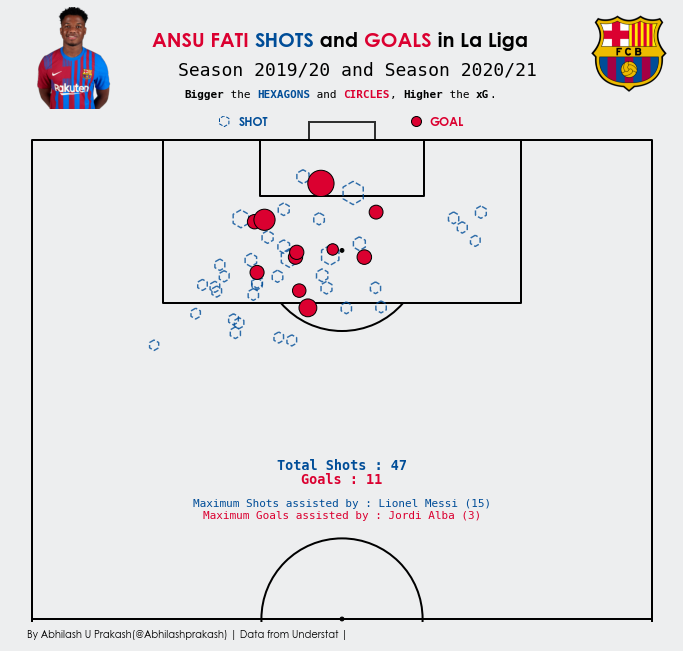

In [182]:
#Creating a figure
fig, ax = plt.subplots(figsize=(12,10))
fig.set_facecolor('#edeeef')
ax.patch.set_facecolor('#edeeef')

#Creating a Pitch
pitch = VerticalPitch(pitch_type = 'opta', pad_bottom=0.5,  
                      half=True, pitch_color = '#edeeef', line_color = 'black',
                      goal_type='box',
                      goal_alpha=0.8)


pitch.draw(ax=ax)

# plot the shots taken
sc1 = pitch.scatter(ansu_df.X, ansu_df.Y,
                    s=(ansu_df.xG * 700) + 100,
                    edgecolors= '#004D98',  
                    c= 'None',    
                    marker='h', ls = '--', lw = 1.45, alpha = 0.8,
                    zorder = 2, ax=ax)
# plot the goals
sc2 = pitch.scatter(ansu_goals.X, ansu_goals.Y,
                     s=(ansu_goals.xG * 1000) + 100,
                    edgecolors='black',  
                    c='#DB0030', 
                    marker='o',
                    zorder = 2, ax=ax)
#plot for legend
sc3 = pitch.scatter(102, 69,
                    s=118,
                    edgecolors='#004D98',  
                    c='None', 
                    marker='h', ls = '--', lw=1, alpha = 1,
                    zorder = 2, ax=ax)
sc4 = pitch.scatter(102, 38,
                    s=100,
                    edgecolors= 'black',  
                    c= '#DB0030',    
                    marker='o',
                    zorder = 2, ax=ax)



#For the text on the pitch
txt = ax.text(x=50, y=66, s='Total Shots : {}'.format(len(ansu_df)),
              size=13.5,
              color='#004D98',
              va='center', ha='center', fontweight = 'bold', fontfamily = 'monospace')
txt2 = ax.text(x=50, y=64.55, s= 'Goals : {}'.format(len(ansu_goals)),
              size=13.5,
              color='#DB0030',
              va='center', ha='center', fontweight = 'bold', fontfamily = 'monospace')
txt3 = ax.text(x=50, y=62, s= 'Maximum Shots assisted by : {} (15)'.format(player_assisted.index[0]),
              size=11,
              color='#004D98',
              va='center', ha='center', fontweight = 'medium', fontfamily = 'monospace')
txt3 = ax.text(x=50, y=60.8, s= 'Maximum Goals assisted by : {} (3)'.format(goal_assisted.index[0]),
              size=11,
              color='#DB0030',
              va='center', ha='center', fontweight = 'medium', fontfamily = 'monospace')


#For the Heading
fig_text(s = '<ANSU FATI> <SHOTS> and <GOALS> in La Liga',
            x = 0.51, y = 0.97,
            fontsize=20,
            fontweight='bold',
            fontfamily = 'Century Gothic',
            color = 'black',
            ha = 'center',
            textalign = 'center',
            highlight_textprops = [{'color':"#DB0030", 'fontweight':'bold'}, {'color':"#004D98", 'fontweight':'bold'},
                                  {'color':"#DB0030", 'fontweight':'bold'}]
        )

fig_text(s = 'Season 2019/20 and Season 2020/21',
            x = 0.53, y = 0.93,
            fontsize=18,
            fontweight='medium',
            fontfamily = 'monospace',
            color = 'black',
            ha = 'center',
            textalign = 'center',
            
        )

fig_text(s = '<Bigger> the <HEXAGONS> and <CIRCLES>, <Higher> the <xG>.',
            x = 0.51, y = 0.89,
            fontsize=11,
            fontweight='medium',
            fontfamily = 'monospace',
            color = 'black',
            ha = 'center',
            textalign = 'center',
            highlight_textprops = [{'color':"black", 'fontweight': 'bold'},{'color':"#004D98", 'fontweight':'bold'}, 
                                   {'color':"#DB0030", 'fontweight':'bold'},
                                   {'color':"black", 'fontweight': 'bold'}, {'color':"black", 'fontweight': 'bold'}]
        )

#Legend
fig_text(s = 'SHOT',
            x = 0.41, y = 0.853,
            fontsize=12,
            fontweight='bold',
            fontfamily = 'Century Gothic',
            color = '#004D98',
            ha = 'center',
            textalign = 'center',
            
        )
fig_text(s = 'GOAL',
            x = 0.634, y = 0.853,
            fontsize=12,
            fontweight='bold',
            fontfamily = 'Century Gothic',
            color = '#DB0030',
            ha = 'center',
            textalign = 'center',
            
        )

#Footer
fig_text(s = 'By Abhilash U Prakash(@Abhilashprakash) | Data from Understat |',
            x = 0.52, y = 0.14,
            fontsize=10,
            fontweight='medium',
            fontfamily = 'Century Gothic',
            color = 'black',
            ha = 'right',
            textalign = 'left',
        
        )


#Loading images and inserting them in the visualization
im = plt.imread('1200px-FC_Barcelona_(crest).svg.png')
newax = fig.add_axes([0.8,0.095,0.09,0.9], anchor='NE', zorder=1)
newax.imshow(im)
newax.axis('off')
im = plt.imread('mini_17-ANSU-FATI-1A-EQUIPACIO-005.png')
newax = fig.add_axes([0.15,0.095,0.1,0.91], anchor='NE', zorder=1)
newax.imshow(im)
newax.axis('off')


#Saving the figure
plt.savefig('ansu_shotmap', dpi=500, bbox_inches='tight');